<a href="https://colab.research.google.com/github/Colley-K/ML_Projects/blob/master/chocolate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHOCOLATE EDA & A COMMICAL REGRESSION

*A fun practice at a linear regression solution to predicting whether or not a chocolate bar will be "good"*

![alt text](https://drive.google.com/uc?id=1XprbhH_NWvr76dHRcNp-fCz1OSj4EJWH)

## 1. Setup & Import 

In [2]:
#Colab stuffs:

#get a fast operator system
!nvidia-smi

#mount google drive
from google.colab import drive
drive.mount('/content/drive')#click on the link it provides and copy and paste that code into the authorization area

#access the OS system to work with current directories:
import os 

Thu Aug 29 21:36:43 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
#importing functions for this notebook
from google.colab import files
uploaded = files.upload()

Saving flavors_of_cacao.csv to flavors_of_cacao.csv


In [0]:
#imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
sns.set_style("whitegrid")
sns.despine()
sns.set(rc={'figure.figsize':(15,9)})
%matplotlib inline

In [0]:
#Turn the CSV files into data frames
chocolate = pd.read_csv('drive/My Drive/datasets/flavors_of_cacao.csv', low_memory=False)  

## 2. Cleaning the Data 

In [38]:
chocolate.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [0]:
#clean up column names
chocolate.columns = chocolate.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
chocolate.columns= ['company-maker', 'bean_origin_or_bar_name', 'ref',
       'review_date', 'cocoa_percent', 'company_location', 'rating',
       'bean_type', 'broad_bean_origin']

In [40]:
chocolate.shape

(1795, 9)

In [41]:
chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
company-maker              1795 non-null object
bean_origin_or_bar_name    1795 non-null object
ref                        1795 non-null int64
review_date                1795 non-null int64
cocoa_percent              1795 non-null object
company_location           1795 non-null object
rating                     1795 non-null float64
bean_type                  1794 non-null object
broad_bean_origin          1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [42]:
#There are only 2 null values in the entire data frame. Since it is such a low value, I will drop all nulls
chocolate.isnull().sum()

company-maker              0
bean_origin_or_bar_name    0
ref                        0
review_date                0
cocoa_percent              0
company_location           0
rating                     0
bean_type                  1
broad_bean_origin          1
dtype: int64

In [0]:
#Dropping null values
chocolate= chocolate.dropna()

In [44]:
#Bean type has a approximately half blank values. Unfortunately, it doesn't make sense to impute this data so we must drop the column
chocolate [chocolate.bean_type == "\xa0"].count()

company-maker              887
bean_origin_or_bar_name    887
ref                        887
review_date                887
cocoa_percent              887
company_location           887
rating                     887
bean_type                  887
broad_bean_origin          887
dtype: int64

In [0]:
#dropping the bean_type column
chocolate= chocolate.drop(['bean_type'], axis=1)

In [0]:
#dropping blanks from broad ben category
chocolate = chocolate[chocolate.broad_bean_origin != "\xa0"]

In [47]:
#checking to see if there are anymore blank entries
"\xa0" in chocolate.values

False

In [48]:
chocolate.head()

,company-maker,bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,Peru


In [0]:
#Transform the cocoa_percent to float numbers
chocolate['cocoa_percent'] = chocolate['cocoa_percent'].str.replace(r'%', r'0').astype('float') / 1000.0

## 3. EDA

Text(0.5, 0, 'Rating (Out of 5 Stars)')

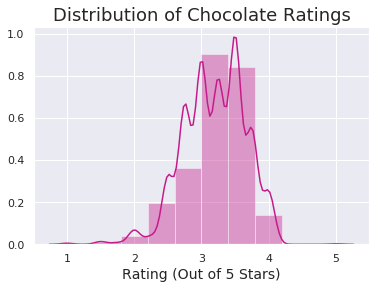

In [66]:
#visual of the ratings distribution

sns.distplot(chocolate.rating, bins= 10, color= '#c51b8a')
plt.title("Distribution of Chocolate Ratings", fontsize=18)
plt.xlabel("Rating (Out of 5 Stars)", fontsize= 14)


Text(0.5, 1.0, 'Cocoa_Percent Distribution')

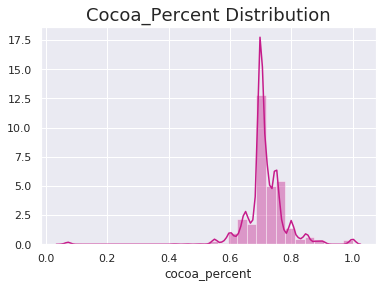

In [51]:
#Dist of cocao percentage

sns.distplot(chocolate.cocoa_percent, bins= 30, color= '#c51b8a')
plt.title("Cocoa_Percent Distribution",fontsize=18)

In [52]:
#Average rating is 3.18 & 25% has a 3.5 rating or better
chocolate.describe()

,ref,review_date,cocoa_percent,rating
count,1720.000000,1720.000000,1720.000000,1720.000000
mean,1052.271512,2012.417442,0.714574,3.195640
std,547.684307,2.876585,0.073726,0.460586
min,5.000000,2006.000000,0.060500,1.000000
25%,607.000000,2010.000000,0.700000,3.000000
50%,1089.000000,2013.000000,0.700000,3.250000
75%,1515.000000,2015.000000,0.750000,3.500000
max,1952.000000,2017.000000,1.000000,5.000000


In [53]:
#Only two ratings abov a 4!
chocolate[chocolate.rating >4].count()

company-maker              1
bean_origin_or_bar_name    1
ref                        1
review_date                1
cocoa_percent              1
company_location           1
rating                     1
broad_bean_origin          1
dtype: int64

<Figure size 2160x1440 with 0 Axes>

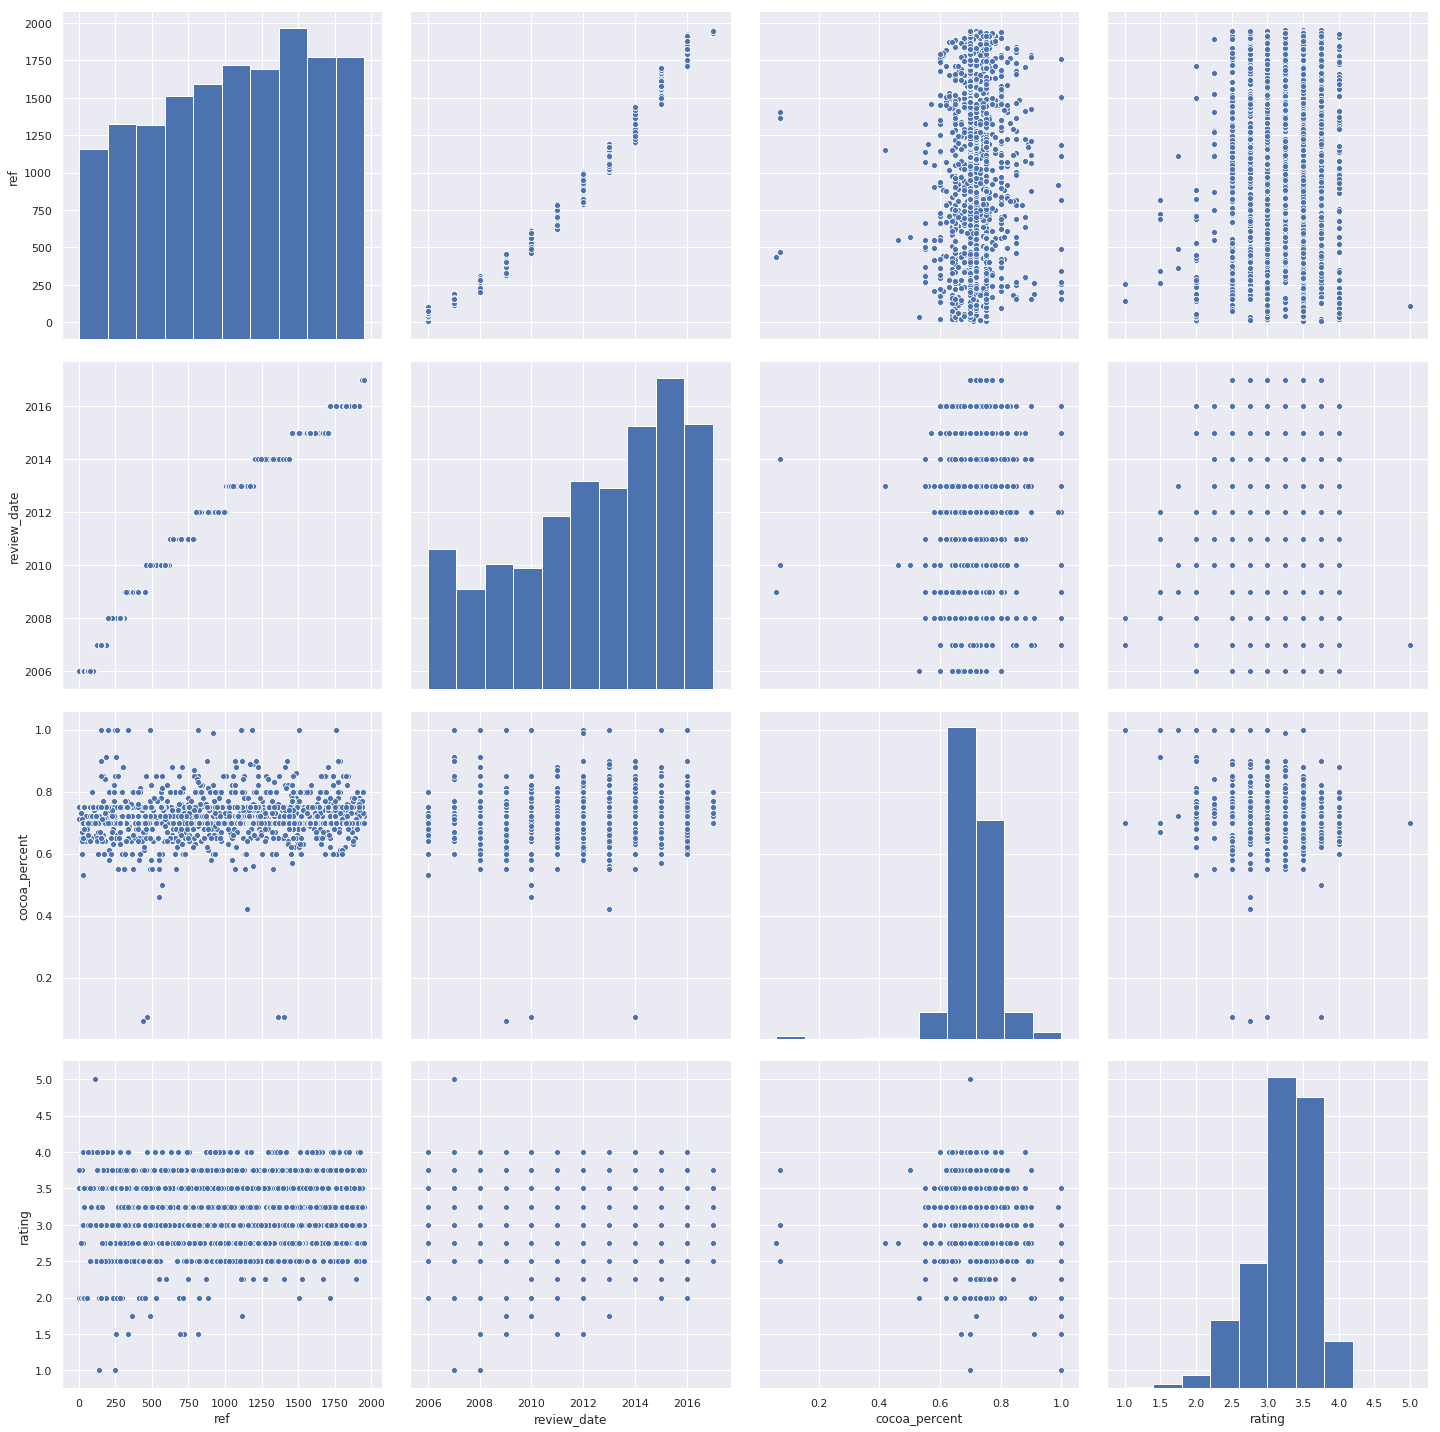

In [54]:
#See if there's a correlation between cocoa_percent, year and customer rating
plt.figure(figsize=(30,20))
sns.pairplot(chocolate, height = 5)


In [55]:
#Theres too many values in bean origin to make a difference
#Theres ALOT of variations in company
#I will try company location and broad_bean origin
chocolate.nunique()

company-maker              409
bean_origin_or_bar_name    980
ref                        440
review_date                 12
cocoa_percent               45
company_location            60
rating                      13
broad_bean_origin           98
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

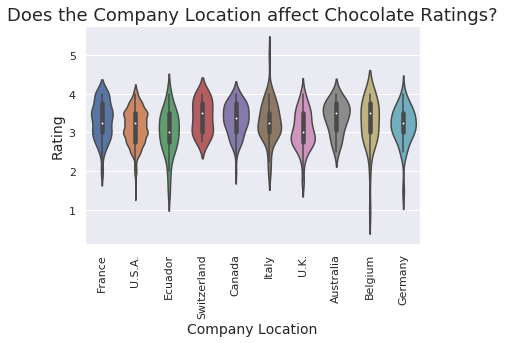

In [56]:
#filter only the top ten locations
ten=chocolate.company_location.value_counts()[:10]
ten= ten.index.tolist()

#create a DF with the top ten locations
ten_df= chocolate[chocolate['company_location'].isin(ten)]
ten_df.head()

#graph the top ten locations to see if one indicates a higher rating
sns.violinplot(x="company_location", y="rating", data=ten_df)
plt.title("Does the Company Location affect Chocolate Ratings?", fontsize=18)
plt.xlabel("Company Location", fontsize=14)
plt.ylabel("Rating", fontsize=14)
plt.xticks(rotation = 90)

['Venezuela', 'Ecuador', 'Peru', 'Madagascar', 'Dominican Republic', 'Nicaragua', 'Brazil', 'Bolivia', 'Belize', 'Papua New Guinea', 'Colombia', 'Vietnam', 'Costa Rica', 'Tanzania', 'Trinidad']


Text(0, 0.5, 'Rating')

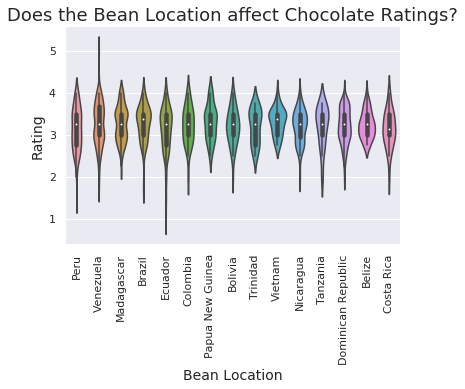

In [57]:
#filter only the top ten locations
bb=chocolate.broad_bean_origin.value_counts()[:15]
bb= bb.index.tolist()

print (bb)
#create a DF with the top ten locations
df15= chocolate[chocolate['broad_bean_origin'].isin(bb)]
df15.head()

#graph the top ten locations to see if one indicates a higher rating
sns.violinplot(x="broad_bean_origin", y="rating", data=df15)
plt.title("Does the Bean Location affect Chocolate Ratings?", fontsize=18)
plt.xlabel("Bean Location", fontsize=14)
plt.xticks(rotation = 90)
plt.ylabel("Rating", fontsize=14)

##3. EDA Findings


*   The findings from the pairplot are fairly commical. The only one I truly wanted to investigate was whether or not there was a relationship between cocoa percent and rating, but this did not produce a relationship. For practice, I will still use a linear regression model to see exactly *how bad* the relationship is.
* The 2 chocolate bars received a rating over 4 stars! The majority of the ratings are between 3 and 4 stars.
* The company's country doesn't influence the rating (no suprise)
* The broad bean origin only showed that Venezuela seems like a slightly better performer, and Ghana and Ecuador teneded to have a lot more lower rated chocolates.

*In a nutshell, this EDA showed me there is not much of a relationship between the continuous variables, and the discrete variables don't seem to differ in their ratings either. HOWEVER, let us proceed and try to fun linear regression!



## 4. How Bad Can Linear Regression Perform?

In [0]:
#predicting the chocolate rating based on the cocoa_percent
X = chocolate['cocoa_percent'].values.reshape(-1,1)
y = chocolate['rating'].values.reshape(-1,1)

In [0]:
#splitting up into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
 #training the algorithm
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
print (f"r-squared score= {regressor.score(X,y)}")
#To retrieve the intercept:
print(f"y-intercept= {regressor.intercept_}")
#For retrieving the slope:
print(f"coefficient = {regressor.coef_}")

r-squared score= 0.008749257155516887
y-intercept= [3.53585809]
coefficient = [[-0.4802313]]


###Findings:
* This means that for every one unit of increase in cocoa percent, the change in the rating is about -.4.
* Also, the r-squared is AWFUL (to be expected from our visuals). The number 1 would mean a perfect correaltion.



In [62]:
#testing out the predictions
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df['diff']= abs(df.Actual- df.Predicted)

#20 worst predictions
df.sort_values(by=['diff'], ascending=False)[:20]

,Actual,Predicted,diff
26,1.5,3.055627,1.555627
109,2.0,3.209301,1.209301
50,2.0,3.175685,1.175685
192,2.0,3.170882,1.170882
54,2.0,3.098848,1.098848
247,2.0,3.055627,1.055627
240,4.0,3.175685,0.824315
87,4.0,3.175685,0.824315
287,4.0,3.175685,0.824315
160,4.0,3.175685,0.824315


In [63]:
#20 Best predictions
df.sort_values(by=['diff'], ascending=False)[-20:]

,Actual,Predicted,diff
139,3.25,3.199696,0.050304
85,3.25,3.199696,0.050304
284,3.25,3.199696,0.050304
88,3.25,3.199696,0.050304
163,3.25,3.199696,0.050304
147,3.25,3.199696,0.050304
150,3.25,3.199696,0.050304
267,3.25,3.199696,0.050304
276,3.25,3.199696,0.050304
270,3.25,3.204498,0.045502


## 5. Conclusions
There wasn't much correlation with this data so ALAS! I must endeavor to just eat all the chocolate bars to determine which are best because this data can't tell me. Oh darn...

## 6. Let's try this problem as a classification problem! Random Forest Time...

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [0]:
chocolate= pd.get_dummies(chocolate,drop_first=True)

In [82]:
#drop the reference column
chocolate.drop(columns=["ref"], inplace= True)

KeyError: ignored

In [0]:
#Group the ratings as if they were stars

def rating_to_stars(rating):
    
    rating = int(rating)
    
    if (rating == 0.0 ):
        return 0.0
    elif (rating > 0 ) and (rating <= 1.99 ):
        return 1.0
    elif (rating >= 2.0 ) and (rating <= 2.99 ):
        return 2.0
    elif (rating >= 3.0 ) and (rating <= 3.99 ):
        return 3.0
    else:
        return 4.0
      
chocolate['rating'] = chocolate['rating'].apply(rating_to_stars)

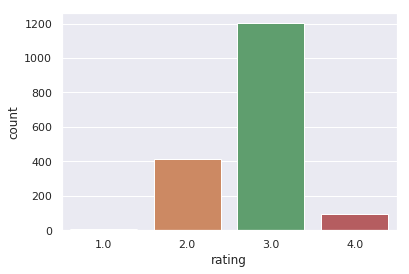

In [74]:
sns.countplot(chocolate['rating'])

In [80]:
chocolate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1720 entries, 0 to 1794
Data columns (total 7 columns):
company-maker              1720 non-null object
bean_origin_or_bar_name    1720 non-null object
review_date                1720 non-null int64
cocoa_percent              1720 non-null float64
company_location           1720 non-null object
rating                     1720 non-null float64
broad_bean_origin          1720 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 187.5+ KB


In [0]:
X = chocolate.drop('rating', axis = 1)
y = chocolate['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [84]:
rfc = RandomForestClassifier(n_estimators=5000, min_weight_fraction_leaf= 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rfc_pred = rfc.predict(X_test)

In [88]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.54      0.13      0.21       115
         3.0       0.75      0.96      0.84       377
         4.0       0.00      0.00      0.00        23

    accuracy                           0.73       516
   macro avg       0.32      0.27      0.26       516
weighted avg       0.67      0.73      0.66       516



In [91]:
print(accuracy_score(y_test,rfc_pred)*100)

73.25581395348837


### Much better! 73% of the time, our random forest classifer predicted the correct rating. This is a terrible regression problem, but do-able as a classification problem.

In [92]:
#curious if Logstic Regression would do better
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

#testing the model
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.7306201550387597


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
